In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# we are using the inline backend
%matplotlib inline 

**<p style="color:red">EXERCISE 1</p>**

Using different Seaborn plots, check the correlation between different penguin characteristics. 

* Use the dataset penguins from Seaborn.
* Check the correlation between flipper length and body mass. Use linear regression plots to make predictions.
* Check the correlation between body mass and bill length. Differentiate data based on sex attribute and create one plot per species. 
* Create a heatmap for the penguins data.
* Check this article and verify the ideas presented using seaborn: https://www.linkedin.com/pulse/penguin-paradox-garima-anand/

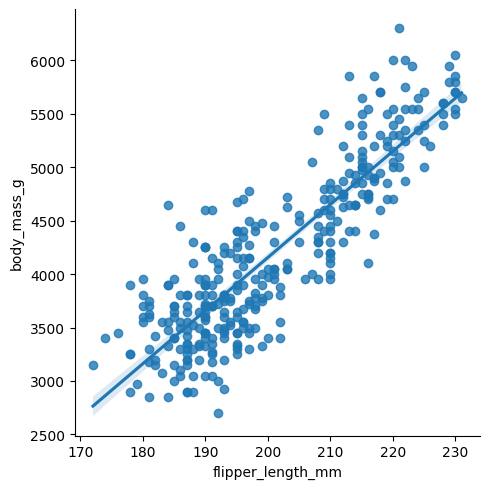

In [82]:
penguins = sns.load_dataset('penguins')

# Correlation between flipper length and body mass using lmplot
sns.lmplot(data = penguins,x = 'flipper_length_mm',y = 'body_mass_g')
plt.show()

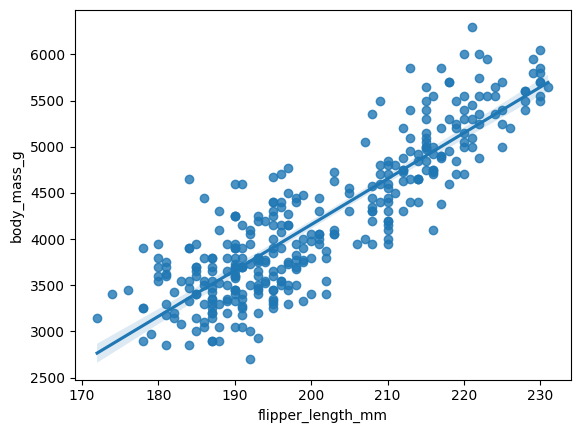

In [83]:
# Correlation between flipper length and body mass using lmplot
sns.regplot(data=penguins,x='flipper_length_mm',y='body_mass_g')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

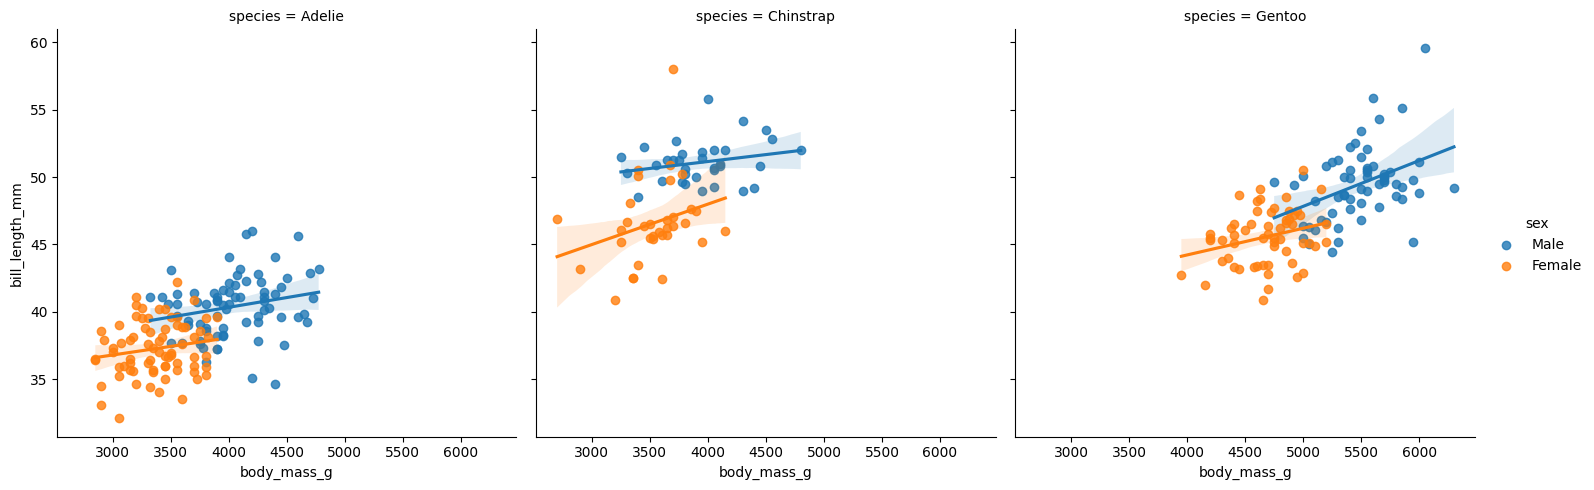

In [84]:
# Correlation between body mass and bill length, diferrentiated by sex
sns.lmplot(data=penguins, x='body_mass_g',y='bill_length_mm', col='species', hue='sex')
plt.show

<Axes: >

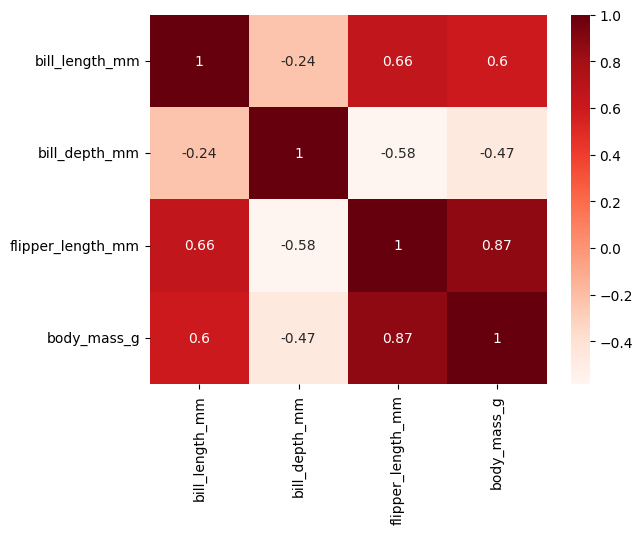

In [85]:
# Heatmap for the penguins data

penguins_mx = penguins.corr(numeric_only=True)
sns.heatmap(penguins_mx, annot=True, cmap='Reds')

**<p style="color:red">EXERCISE 2</p>**

Create different seaborn plots for the dataset 'attention'.

* Create a facet grid with each the solution scores of each subject. Put each person in their own plot with 5 per line and plot their scores.
* Create a regression plot with data separated by attention attribute (divided vs. focused). You should have two plots here. Check the difference between setting *col="attention"* and *hue="attention"*.

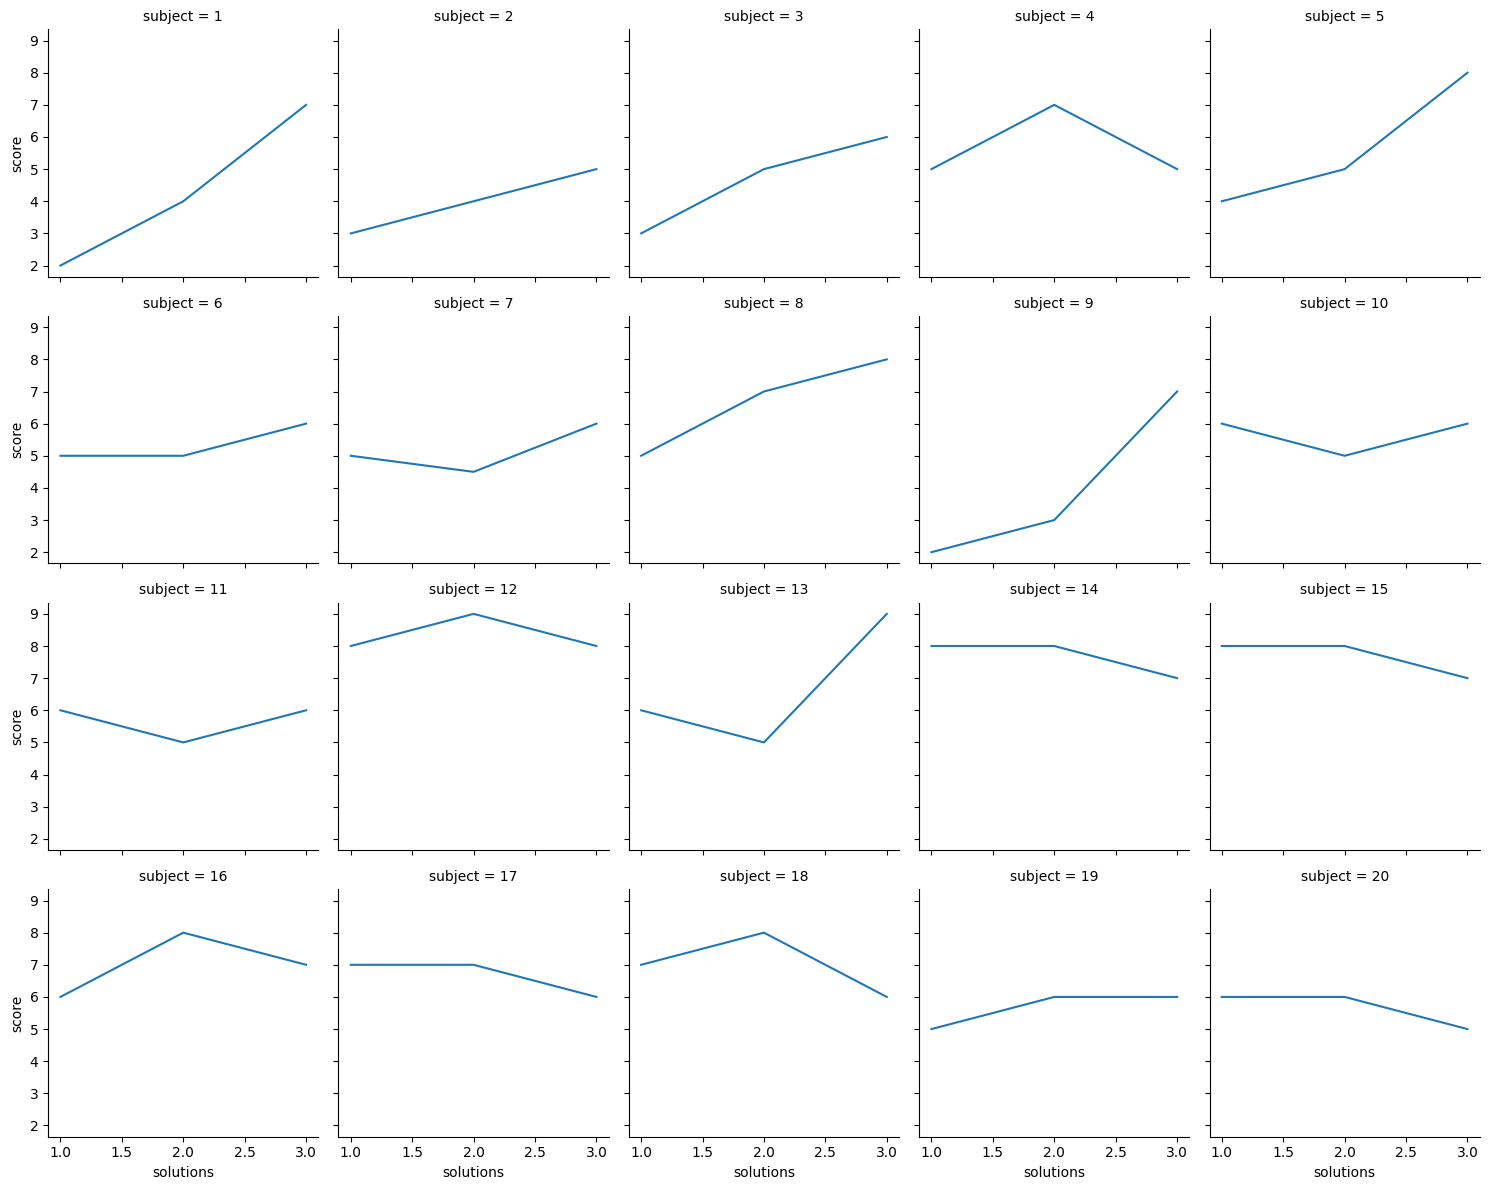

In [86]:
attention = sns.load_dataset('attention')

# facet grid
attention_g = sns.FacetGrid(attention, col="subject", col_wrap=5, height=3)
attention_g.map(sns.lineplot, "solutions", "score")

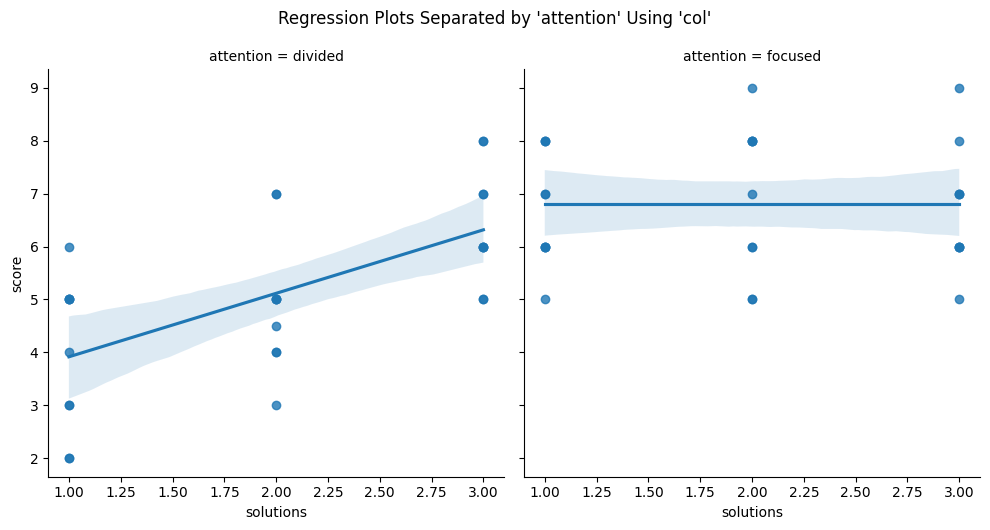

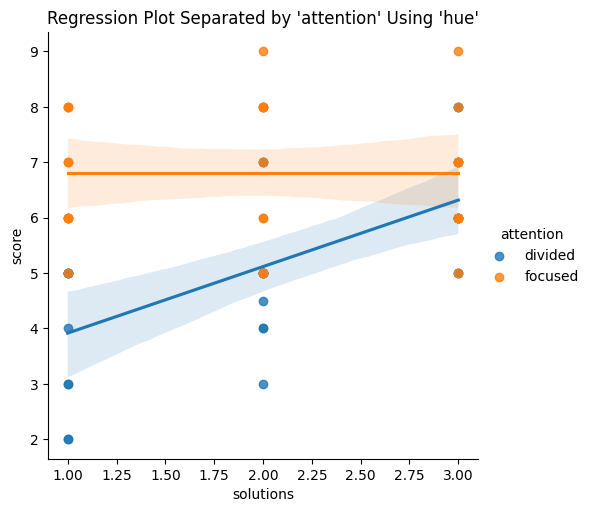

In [87]:
# Regression plot with data separated by attention using col and hue

sns.lmplot(data=attention, x="solutions", y="score", col="attention", height=5)
plt.suptitle("Regression Plots Separated by 'attention' Using 'col'", y=1.05)
plt.show()

sns.lmplot(data=attention, x="solutions", y="score", hue="attention", height=5)
plt.title("Regression Plot Separated by 'attention' Using 'hue'")
plt.show()

**<p style="color:red">EXERCISE 3</p>**

Create different seaborn plots for the Canada immigration dataset.

* Create a regression plot for the Romanian immigrants from 1980 to 2013.
* Create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.
* Create any other seaborn plots you consider most interesting.

In [88]:
df_canada = pd.read_excel('../datasets/Canada.xlsx',
                          sheet_name='Canada by Citizenship',
                          skiprows=range(20),
                          skipfooter=2)

# 1. Remove columns that are not necessary
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# 2. Rename some columns
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# 3. Column labels should be strings
df_canada.columns = list(map(str, df_canada.columns))

# 4. Set the index to the country column
df_canada.set_index('Country', inplace=True)

# 5. Add an extra column: Total
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)

# Create a list of years from 1980 - 2013 as strings
years = list(map(str, range(1980, 2014)))

<Axes: xlabel='year', ylabel='total'>

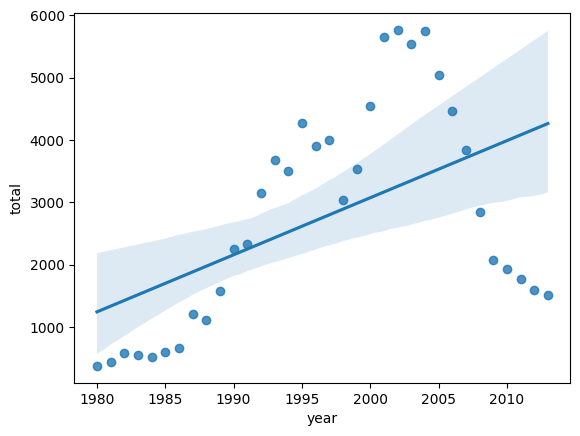

In [89]:
# Regression plot for the Romanian immigrants from 1980 to 2013.as_integer_ratiodf_romania = df_canada.loc[['Romania'], years].T

df_romania = df_canada.loc[['Romania'], years].T
df_romania.index = map(float, df_romania.index)
df_romania.reset_index(inplace=True)
df_romania.columns = ['year', 'total']
sns.regplot(x='year', y='total', data=df_romania)

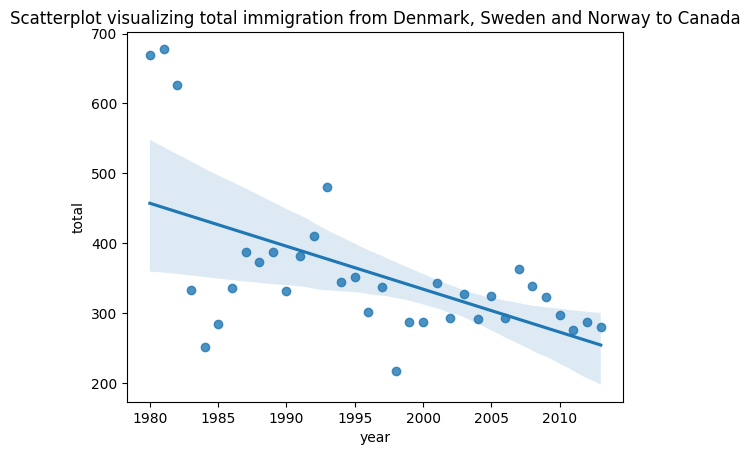

In [91]:
# Scatter plot with a regression line to visualize the 
# total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

countries = ['Denmark', 'Sweden', 'Norway']
df_dsn = df_canada.loc[countries, years].T

df_dsn['Total'] = df_dsn.sum(axis=1)

df_dsn.drop(columns=countries, inplace=True)

df_dsn.index = map(float, df_dsn.index)
df_dsn.reset_index(inplace=True)
df_dsn.columns = ['year', 'total']

sns.regplot(data=df_dsn, x='year', y='total')
plt.title('Scatterplot visualizing total immigration from Denmark, Sweden and Norway to Canada')
plt.show()


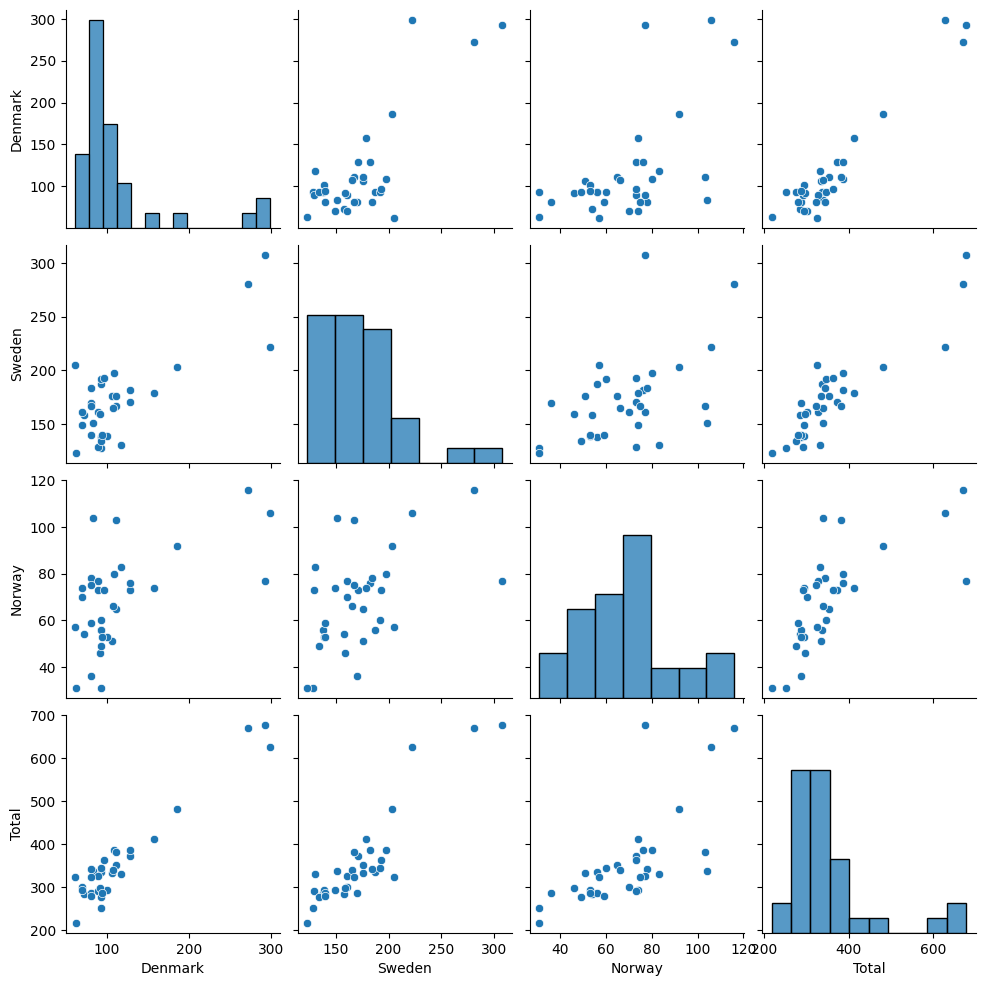

In [95]:
countries = ['Denmark', 'Sweden', 'Norway']
df_dsn2 = df_canada.loc[countries, years].T

df_dsn2['Total'] = df_dsn2.sum(axis=1)

sns.pairplot(df_dsn2)